LAST 10 REGULAR RACES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

regular = pd.read_csv('F1_2023_Regular.csv')

scoring = pd.read_csv('scoring.csv')

In [6]:
regular

,driver,team,BHR,SAU,AUS,AZE,MIA,MON,ESP,CAN,...,NED,ITA,SIN,JPN,QAT,USA,MXC,SAP,LVG,ABU
0,Verstappen,RB,1,2,1,2,1.0,1,1.0,1,...,1,1,5,1,1,1,1,1,1,1.0
1,Perez,RB,2,1,5,1,2.0,16,4.0,6,...,4,2,8,Ret,10,4,Ret,4,3,4.0
2,Hamilton,Merc,5,5,2,6,6.0,4,2.0,3,...,6,6,3,5,Ret,DSQ,2,8,7,9.0
3,Alonso,Aston,3,3,3,4,3.0,2,7.0,2,...,2,9,15,8,6,Ret,Ret,3,9,7.0
4,Leclerc,Ferarri,Ret,7,Ret,3,7.0,6,11.0,4,...,Ret,4,4,4,5,DSQ,3,DNS,2,2.0
5,Norris,McLaren,17,17,6,9,17.0,9,17.0,13,...,7,8,2,2,3,2,5,2,Ret,5.0
6,Sainz,Ferarri,4,6,12,5,5.0,8,5.0,5,...,5,3,1,6,DNS,3,4,6,6,18.0
7,Russell,Merc,7,4,Ret,8,4.0,5,3.0,Ret,...,17,5,16,7,4,5,6,Ret,8,3.0
8,Piastri,McLaren,Ret,15,8,11,19.0,10,13.0,11,...,9,12,7,3,2,Ret,8,14,10,6.0
9,Stroll,Aston,6,Ret,4,7,12.0,Ret,6.0,9,...,11,16,WD,Ret,11,7,17,5,5,10.0


In [7]:
scoring

,place,race,sprint,fastest_lap
0,1,25,8.0,1.0
1,2,18,7.0,NaN
2,3,15,6.0,NaN
3,4,12,5.0,NaN
4,5,10,4.0,NaN
5,6,8,3.0,NaN
6,7,6,2.0,NaN
7,8,4,1.0,NaN
8,9,2,NaN,NaN
9,10,1,NaN,NaN


In [8]:
# Replace all those nasty text values in the regular dataframe
regular.replace("Ret", 0, inplace=True)
regular.replace("DNS", 0, inplace=True)
regular.replace("DSQ", 0, inplace=True)
regular.replace("WD", 0, inplace=True)
regular.fillna(0, inplace=True)

In [9]:
# Convert the values that look like numbers - to numbers!
regular.iloc[:, 2:] = regular.iloc[:, 2:].astype('int64')

C:\Users\SYAM PRASAD\AppData\Local\Temp\ipykernel_11376\2685764332.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  regular.iloc[:, 2:] = regular.iloc[:, 2:].astype('int64')


In [10]:
acc_points = []

In [11]:
# define a mechanism to convert the positions (place) in the race with points scored 
# (race represents points for a regular race, while spint is of course the points for a sprint race)
def calc_race_points(place, race):
    return race[place-1]

In [12]:
# Define the function to calculate r_points
def calculate_r_points(row):
    r_points = []
    for i in range(1, len(row)):
        try:
            if int(row[i]) in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
                r_points.append(calcd_rac_points(int(row[i]), race))
            else:
                r_points.append(0)
        except ValueError:
            r_points.append(0)
    return r_points

In [13]:
#Create a new dataframe called 'acc_points'
regulr_acc_points10 = pd.DataFrame({
    'driver': regular['driver'],'team': regular['team'],
    'r_points': regular.iloc[:, 13:].apply(lambda row: row.map(scoring.set_index('place')['race']).fillna(0).sum(), axis=1)
})

In [15]:
regulr_acc_points10 = regulr_acc_points10.sort_values(by ='r_points', ascending = False)
print(regulr_acc_points10)

        driver       team  r_points
0   Verstappen         RB     260.0
5       Norris    McLaren     123.0
4      Leclerc    Ferarri     112.0
1        Perez         RB     104.0
6        Sainz    Ferarri     101.0
2     Hamilton       Merc      83.0
7      Russell       Merc      73.0
3       Alonso      Aston      65.0
8      Piastri    McLaren      54.0
10       Gasly     Alpine      38.0
9       Stroll      Aston      29.0
11        Ocon     Alpine      27.0
12       Albon   Williams      14.0
13     Tsunoda     AlphaT      11.0
16   Ricciardo     AlphaT       6.0
14      Bottas  AlfaRomeo       5.0
17      Guanyu  AlfaRomeo       2.0
19      Lawson     AlphaT       2.0
18   Magnussen       Haas       1.0
20    Sargeant   Williams       1.0
15  Hulkenberg       Haas       0.0
21    de Vries     AlphaT       0.0


In [16]:
teams10 = regulr_acc_points10.groupby('team')['r_points'].sum().reset_index(name='t10_points')
teams10 = teams10.sort_values(by='t10_points', ascending=False)

print(" ")

print("Team rankings from last 10 races")
print(" ")
print(teams10.to_markdown(index=False))

 
Team rankings from last 10 races
 
| team      |   t10_points |
|:----------|-------------:|
| RB        |          364 |
| Ferarri   |          213 |
| McLaren   |          177 |
| Merc      |          156 |
| Aston     |           94 |
| Alpine    |           65 |
| AlphaT    |           19 |
| Williams  |           15 |
| AlfaRomeo |            7 |
| Haas      |            1 |


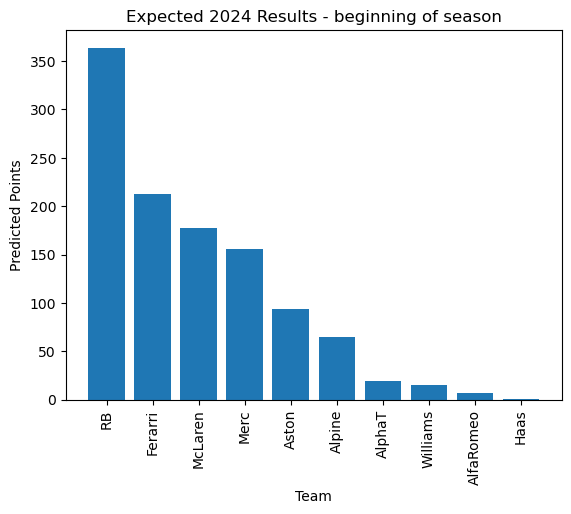

In [17]:
plt.xlabel('Team')
plt.ylabel('Predicted Points')
plt.title('Expected 2024 Results - beginning of season')


# Plot the results
plt.bar(teams10['team'], teams10['t10_points'])
plt.xticks(rotation=90)
plt.show()

TWO HALVES OF THE SEASON

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


regular = pd.read_csv('F1_2023_Regular.csv')

scoring = pd.read_csv('scoring.csv')

In [22]:
# Replace all those nasty text values in the regular dataframe
regular.replace("Ret", 0, inplace=True)
regular.replace("DNS", 0, inplace=True)
regular.replace("DSQ", 0, inplace=True)
regular.replace("WD", 0, inplace=True)
regular.fillna(0, inplace=True)
# Now to convert the values that look like numbers - to numbers!
regular.iloc[:, 2:] = regular.iloc[:, 2:].astype('int64')

acc_points = []

C:\Users\SYAM PRASAD\AppData\Local\Temp\ipykernel_11376\1103539051.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  regular.iloc[:, 2:] = regular.iloc[:, 2:].astype('int64')


In [24]:
# Define a mechanism to convert the positions (place) in the race with points scored (race represents points for a regular race, while spint is of course the points for a sprint race
def calcd_rac_points(place, race):
    return race[place - 1]


# Define the function to calculate r_points
def calculate_r_points(row):
    r_points = []
    for i in range(1, len(row)):
        try:
            if int(row[i]) in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
                r_points.append(calcd_rac_points(int(row[i]), race))
            else:
                r_points.append(0)
        except ValueError:
            r_points.append(0)
    return r_points

In [25]:
#Create a new dataframe called 'acc_points'
regulr_acc_points_A = pd.DataFrame({
    'driver': regular['driver'],'team': regular['team'],
    'r_points': regular.iloc[:, 2:12].apply(lambda row: row.map(scoring.set_index('place')['race']).fillna(0).sum(), axis=1)
})

In [29]:
regulr_acc_points_A = regulr_acc_points_A.sort_values(by ='r_points', ascending = False)

teams_A = regulr_acc_points_A.groupby('team')['r_points'].sum().reset_index(name='t_A_points')
teams_A = teams_A.sort_values(by='t_A_points', ascending=False)

print(" ")

print("Team rankings from first 10 2023 races")
print(" ")
print(teams_A.to_markdown(index=False))

 
Team rankings from first 10 2023 races
 
| team      |   t_A_points |
|:----------|-------------:|
| RB        |          375 |
| Merc      |          193 |
| Aston     |          168 |
| Ferarri   |          140 |
| McLaren   |           59 |
| Alpine    |           45 |
| Williams  |           11 |
| AlfaRomeo |            9 |
| Haas      |            8 |
| AlphaT    |            2 |


In [30]:
two_halves=pd.merge(teams_A,teams10, on='team')
two_halves['season_diff'] = ((two_halves.t10_points - two_halves.t_A_points)/ two_halves.t10_points)

print(two_halves)

        team  t_A_points  t10_points  season_diff
0         RB       375.0       364.0    -0.030220
1       Merc       193.0       156.0    -0.237179
2      Aston       168.0        94.0    -0.787234
3    Ferarri       140.0       213.0     0.342723
4    McLaren        59.0       177.0     0.666667
5     Alpine        45.0        65.0     0.307692
6   Williams        11.0        15.0     0.266667
7  AlfaRomeo         9.0         7.0    -0.285714
8       Haas         8.0         1.0    -7.000000
9     AlphaT         2.0        19.0     0.894737


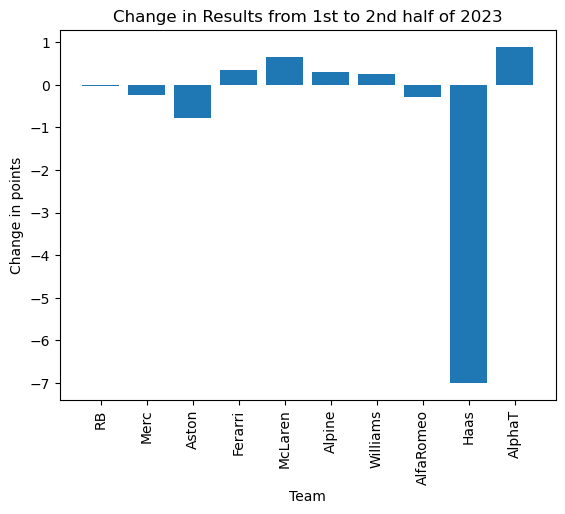

In [31]:
# Add labels and title
plt.xlabel('Team')
plt.ylabel('Change in points')
plt.title('Change in Results from 1st to 2nd half of 2023')

# Plot the results
plt.bar(two_halves['team'], two_halves['season_diff'])
plt.xticks(rotation=90)
plt.show()

LAST 5 REGULAR RACES

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

regular = pd.read_csv('F1_2023_Regular.csv')

scoring = pd.read_csv('scoring.csv')

In [34]:
# Replace all those nasty text values in the regular dataframe
regular.replace("Ret", 0, inplace=True)
regular.replace("DNS", 0, inplace=True)
regular.replace("DSQ", 0, inplace=True)
regular.replace("WD", 0, inplace=True)
regular.fillna(0, inplace=True)
# Now to convert the values that look like numbers - to numbers!
regular.iloc[:, 2:] = regular.iloc[:, 2:].astype('int64')

acc_points = []

C:\Users\SYAM PRASAD\AppData\Local\Temp\ipykernel_11376\1103539051.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  regular.iloc[:, 2:] = regular.iloc[:, 2:].astype('int64')


In [35]:
# define a mechanism to convert the positions (place) in the race with points scored (race represents points for a regular race, while spint is of course the points for a sprint race
def calcd_rac_points(place, race):
    return race[place - 1]


# Define the function to calculate r_points
def calculate_r_points(row):
    r_points = []
    for i in range(1, len(row)):
        try:
            if int(row[i]) in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
                r_points.append(calcd_rac_points(int(row[i]), race))
            else:
                r_points.append(0)
        except ValueError:
            r_points.append(0)
    return r_points

In [39]:
#Create a new dataframe called 'acc_points'
regulr_acc_points5 = pd.DataFrame({
    'driver': regular['driver'],'team': regular['team'],
    'r_points': regular.iloc[:, 18:].apply(lambda row: row.map(scoring.set_index('place')['race']).fillna(0).sum(), axis=1)
})

In [40]:
print(regulr_acc_points5)

teams5 = regulr_acc_points5.groupby('team')['r_points'].sum().reset_index(name='t5_points')
teams5 = teams5.sort_values(by='t5_points', ascending=False)

print(" ")

        driver       team  r_points
0   Verstappen         RB     150.0
1        Perez         RB      52.0
2     Hamilton       Merc      30.0
3       Alonso      Aston      31.0
4      Leclerc    Ferarri      61.0
5       Norris    McLaren      71.0
6        Sainz    Ferarri      43.0
7      Russell       Merc      49.0
8      Piastri    McLaren      31.0
9       Stroll      Aston      27.0
10       Gasly     Alpine      14.0
11        Ocon     Alpine      20.0
12       Albon   Williams       4.0
13     Tsunoda     AlphaT      10.0
14      Bottas  AlfaRomeo       4.0
15  Hulkenberg       Haas       0.0
16   Ricciardo     AlphaT       6.0
17      Guanyu  AlfaRomeo       2.0
18   Magnussen       Haas       0.0
19      Lawson     AlphaT       0.0
20    Sargeant   Williams       1.0
21    de Vries     AlphaT       0.0
 


In [41]:
print("Team rankings from last 5 races")
print(" ")
print(teams5.to_markdown(index=False))

Team rankings from last 5 races
 
| team      |   t5_points |
|:----------|------------:|
| RB        |         202 |
| Ferarri   |         104 |
| McLaren   |         102 |
| Merc      |          79 |
| Aston     |          58 |
| Alpine    |          34 |
| AlphaT    |          16 |
| AlfaRomeo |           6 |
| Williams  |           5 |
| Haas      |           0 |


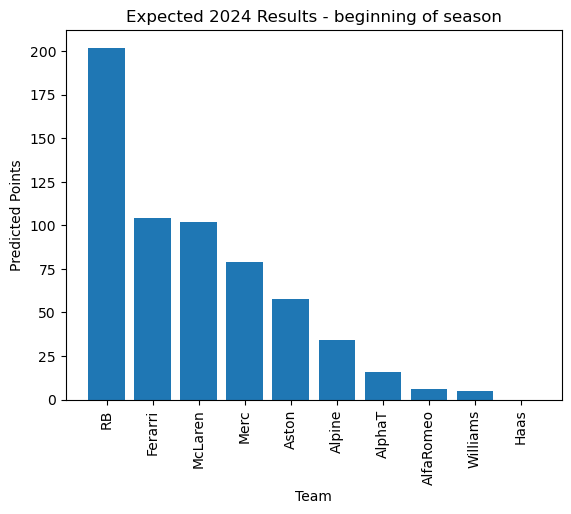

In [45]:
plt.xlabel('Team')
plt.ylabel('Predicted Points')
plt.title('Expected 2024 Results - beginning of season')
plt.bar(teams5['team'], teams5['t5_points'])
plt.xticks(rotation=90)
plt.show()